In [1]:
using Pkg
Pkg.activate(homedir() * "/CodingFiles/JuliaEnvs/Numerics")
using FFTW, Plots, LaTeXStrings, DelimitedFiles
include("julia_fft/burgers_solver.jl")


  Activating project at `~/CodingFiles/JuliaEnvs/Numerics`


burgers_solver_rfft (generic function with 1 method)

In [2]:
# Numerical solution of 1-D viscous Burgers equation on [0, L], periodic boundary
nu = 0.01
L = 2 * pi
T = 1
# discretization
N = 1280
dt = 0.001
h = L / N
x = (0:N-1) * h # must not include the right endpoint
# initial value
u_init = sin.(2 * pi / L * x) + 2 * sin.(10 * pi / L * x) + cos.(20 * pi / L * x)


# solving
u2, u_data, t_data = burgers_solver_fft(nu, L, T, dt, N, u_init)


(ComplexF64[0.11764708281480303 - 6.652096934254845e-15im, 0.12632867051884947 - 6.3872209962246146e-15im, 0.1350052478228414 - 6.350939690649086e-15im, 0.14367718290160303 - 6.671972485943943e-15im, 0.15234483084408107 - 6.512816684116319e-15im, 0.16100852271603353 - 6.809430808503653e-15im, 0.16966855569352346 - 6.5767592138262706e-15im, 0.17832518447337675 - 6.358779204860103e-15im, 0.18697861412506725 - 6.5713688472478555e-15im, 0.19562899450408316 - 6.192422391894144e-15im  …  0.030489417433035015 - 7.789297820627713e-15im, 0.03923565248487844 - 7.446626310622046e-15im, 0.04797508882790816 - 7.482880801005216e-15im, 0.05670759095427478 - 7.70092259882208e-15im, 0.06543311511442056 - 7.701760481621152e-15im, 0.07415170378843676 - 7.92590473224966e-15im, 0.08286347830982194 - 7.241064206052676e-15im, 0.09156862987584091 - 7.246139184451135e-15im, 0.1002674092154984 - 6.996867242749279e-15im, 0.10896011521439625 - 6.813346669512533e-15im], Complex[1.0 + 0.0im 1.052786632058995 + 0.0i

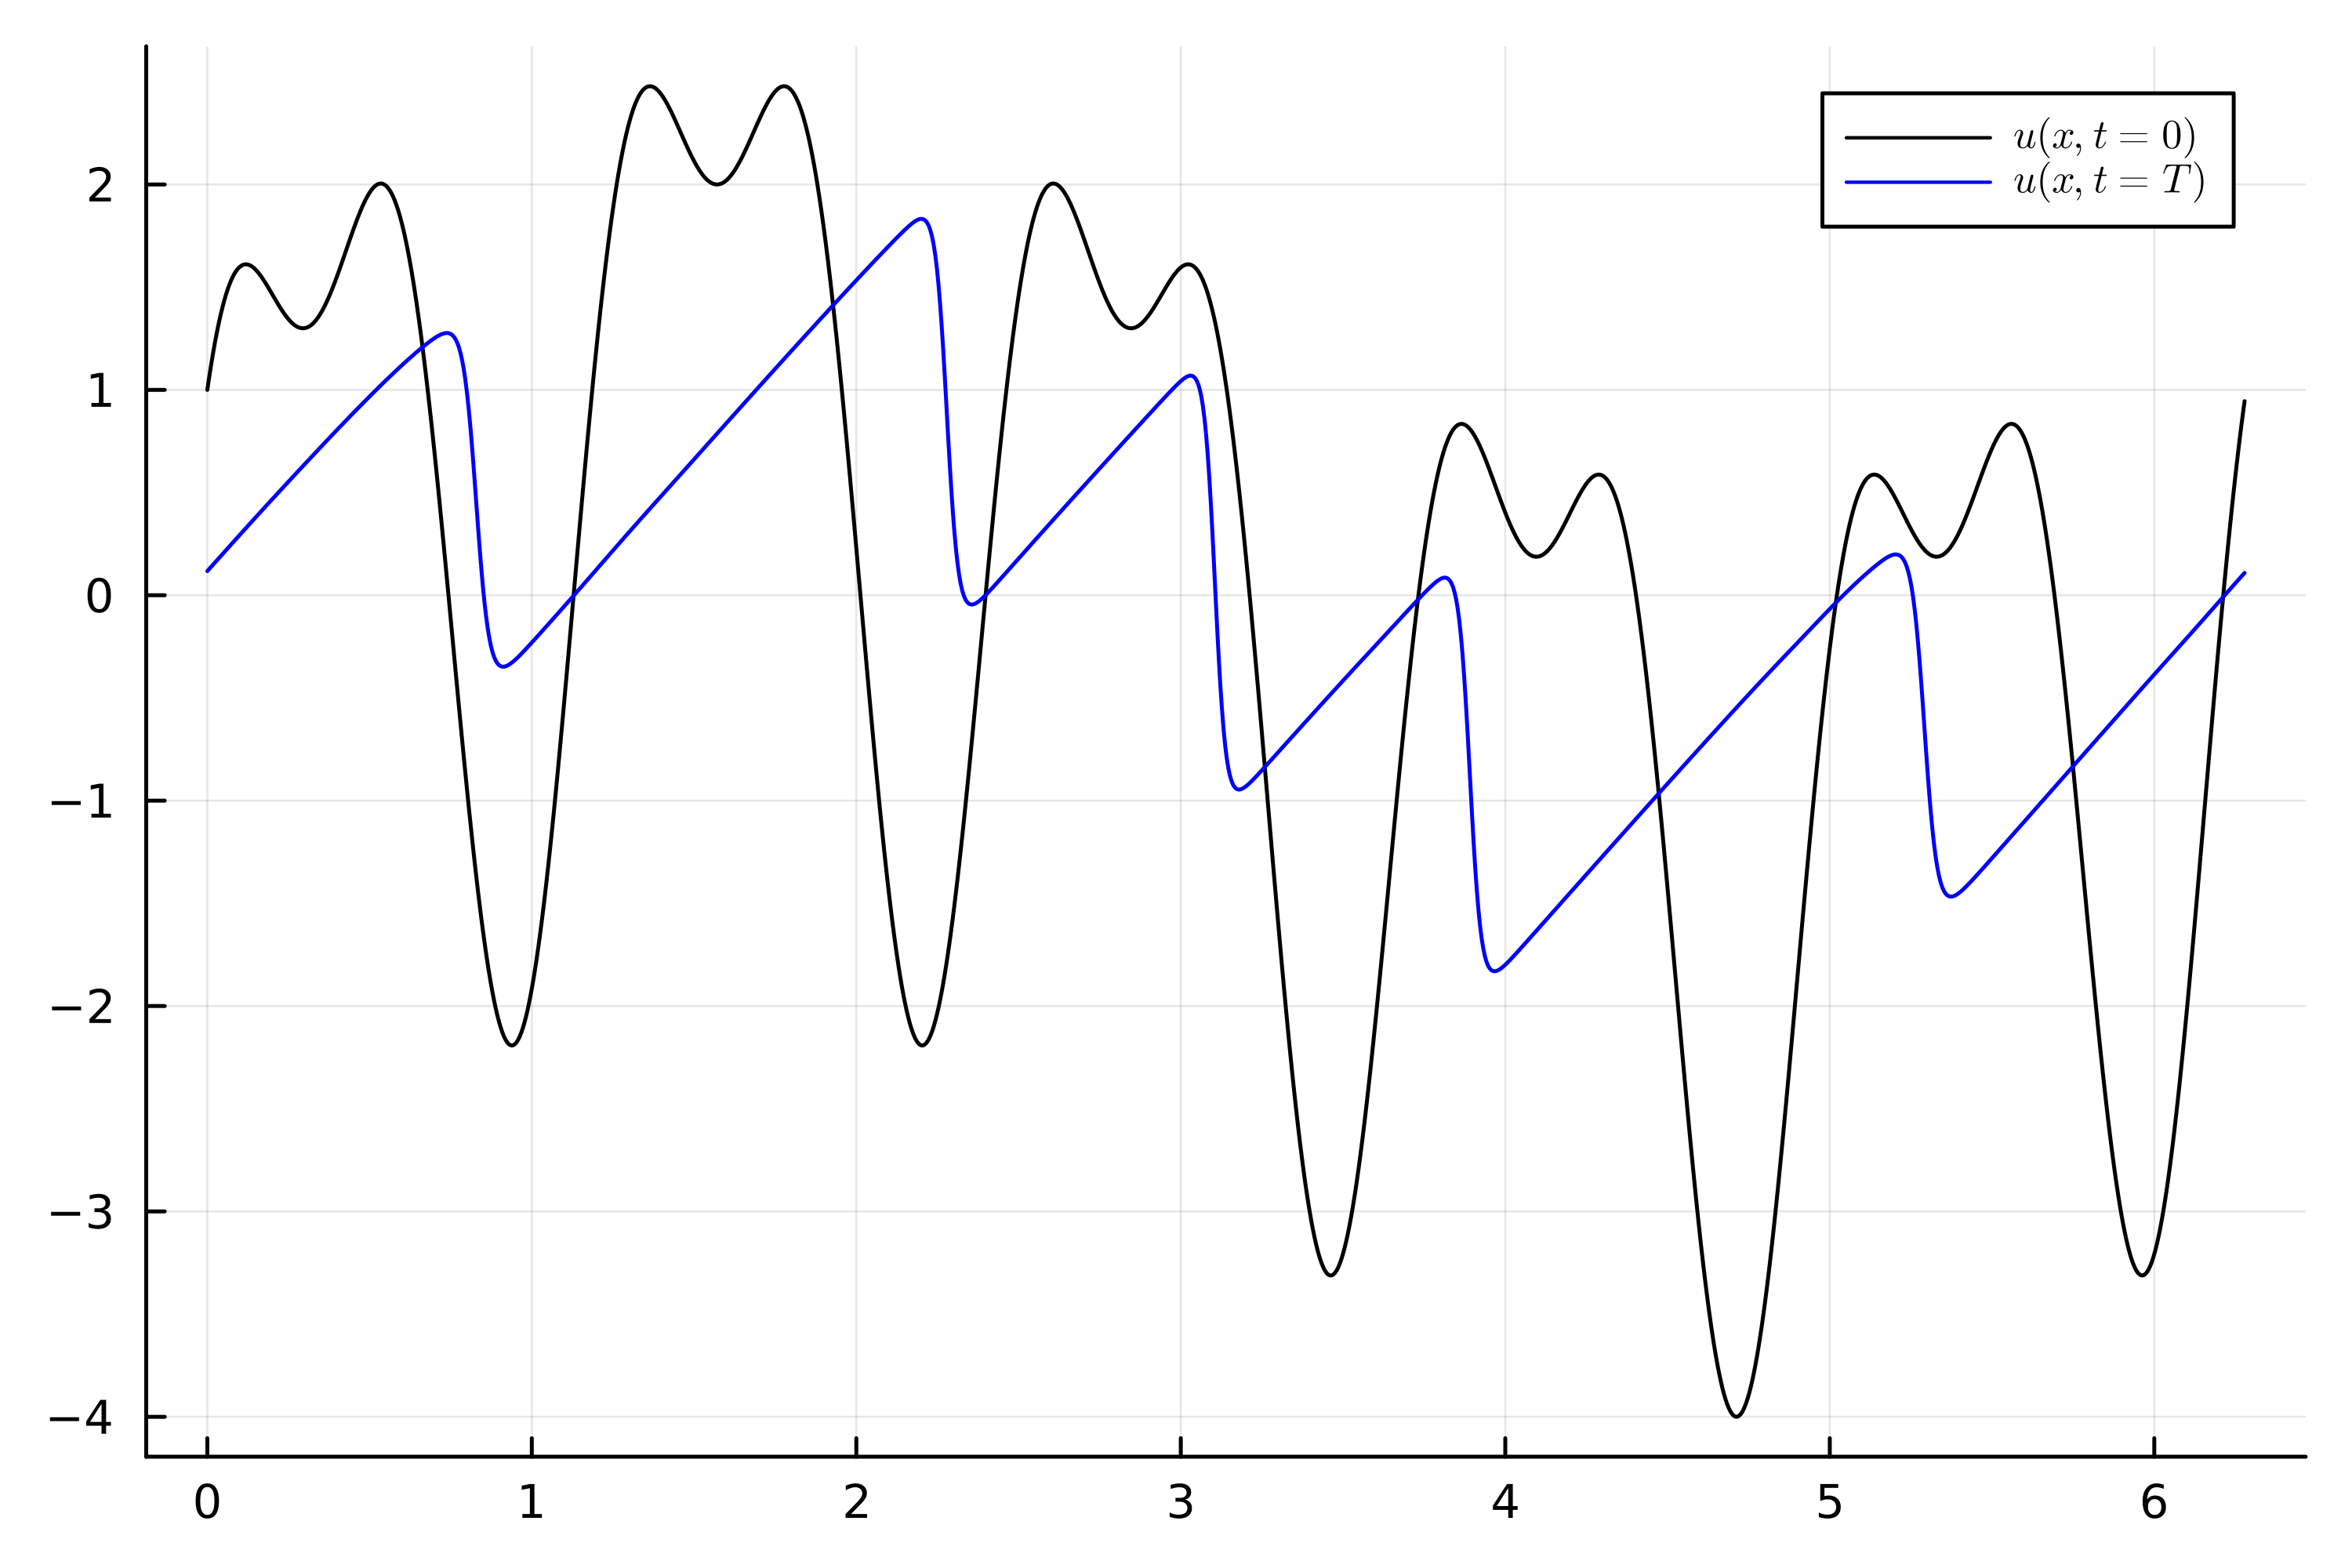

In [3]:
plot(x, u_init, label = L"u(x,t=0)",linecolor = "black",dpi = 500,legendfontsize = 7)
plot!(x, real(u2), label = L"u(x,t=T)", linecolor = "blue")

In [4]:
u_init = readdlm("../GP1.txt")
u_init = u_init[1:end-1]
u2, u_data, t_data = burgers_solver_rfft(nu, L, T, dt, N, u_init)

([-0.5258471118978811, -0.5252302169225749, -0.5245639645759351, -0.5238471051092837, -0.5230784328544383, -0.5222567879486457, -0.521381057898876, -0.5204501789826387, -0.519463137483444, -0.5184189707599954  …  -0.529603667179173, -0.5294034417115163, -0.5291682969367297, -0.5288966685710345, -0.528587011628027, -0.5282378033887696, -0.5278475462893962, -0.5274147707150074, -0.5269380376892034, -0.5264159414492847], [-0.5163355121218534 -0.5163520025214233 … -0.5164014537092808 -0.516352002521423; -0.5164778273719381 -0.5165115712008846 … -0.5165087678803205 -0.5164768940184824; … ; -0.5263055117838613 -0.5257178276591148 … -0.5273391312236305 -0.5268454897556223; -0.5258471118978811 -0.5252302169225749 … -0.5269380376892034 -0.5264159414492847], [0.0, 0.010000000000000002, 0.02000000000000001, 0.03000000000000002, 0.04000000000000003, 0.05000000000000004, 0.060000000000000046, 0.07000000000000005, 0.08000000000000006, 0.09000000000000007  …  0.9100000000000007, 0.9200000000000007, 0

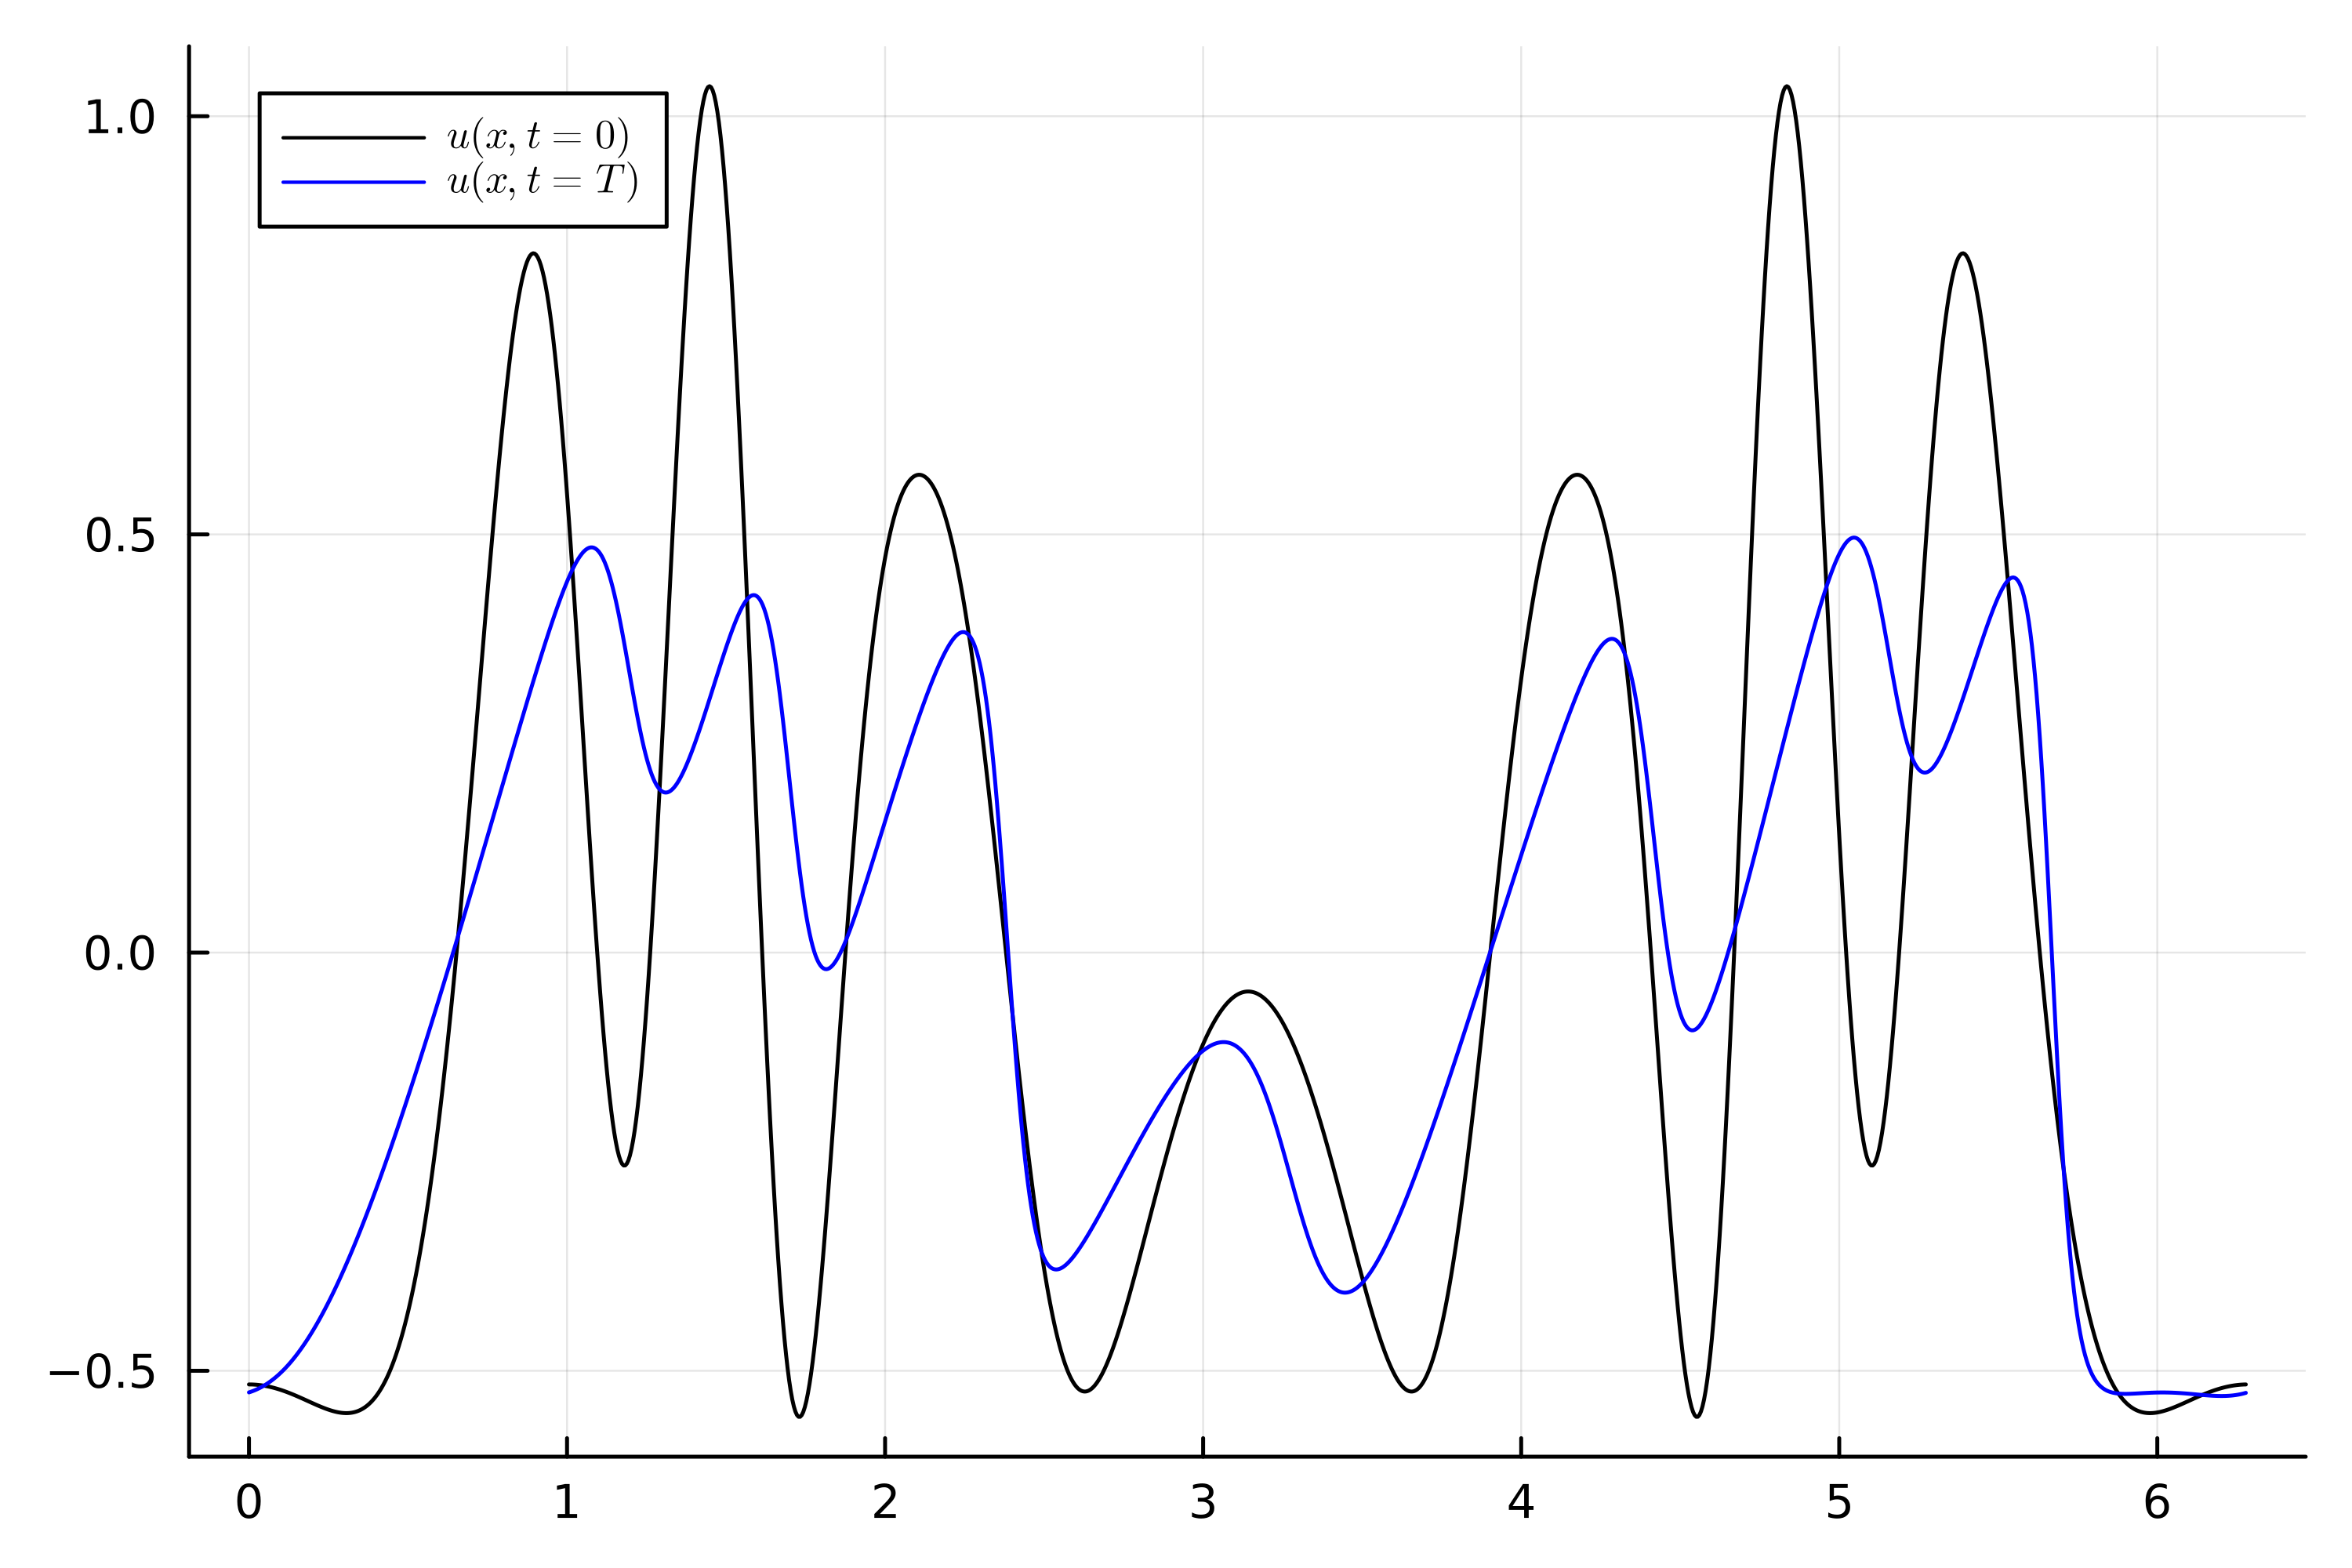

In [5]:
plot(x, u_init, label = L"u(x,t=0)",linecolor = "black",dpi = 500,legendfontsize = 7)
plot!(x, u2, label = L"u(x,t=T)", linecolor = "blue")